Visualizing Closeness...


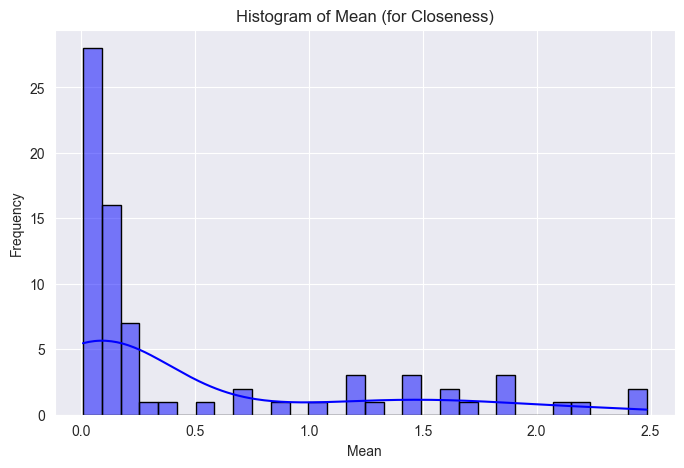

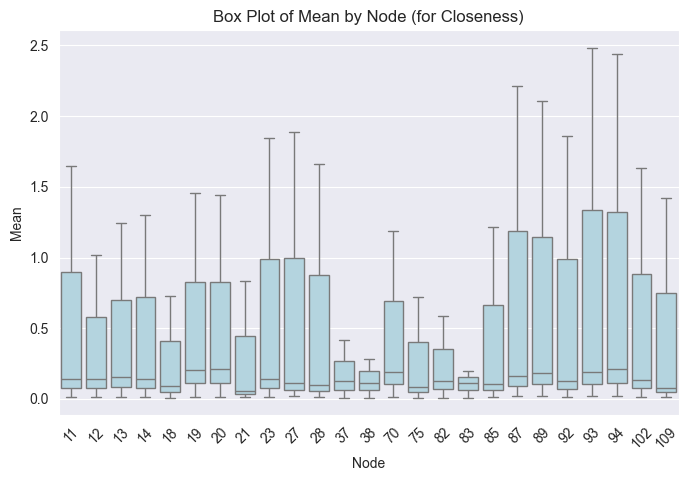

Visualizing Clustering...


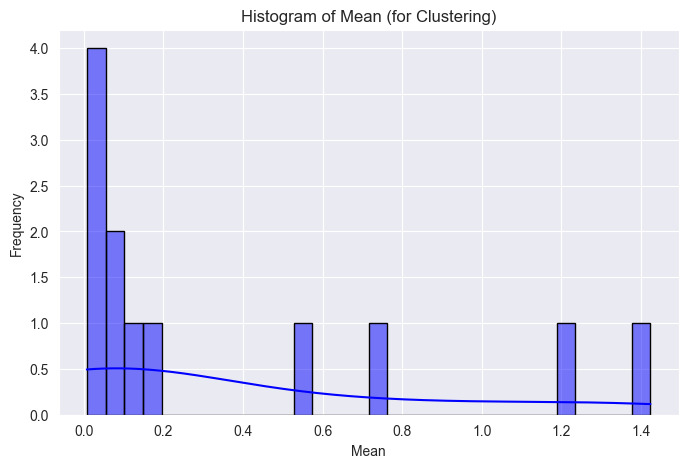

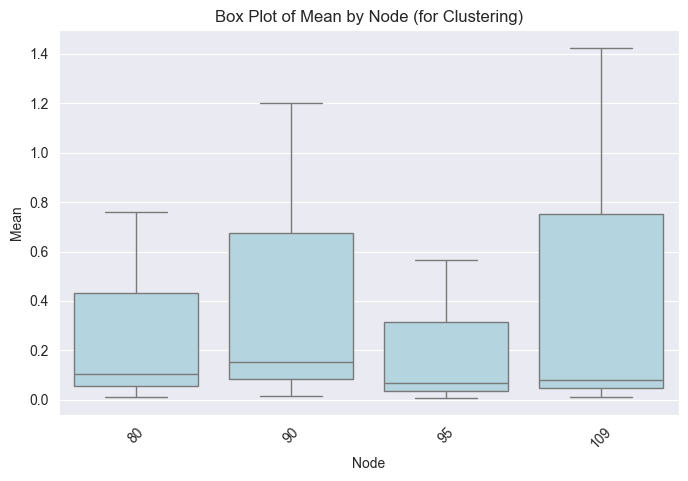

Visualizing Degree...


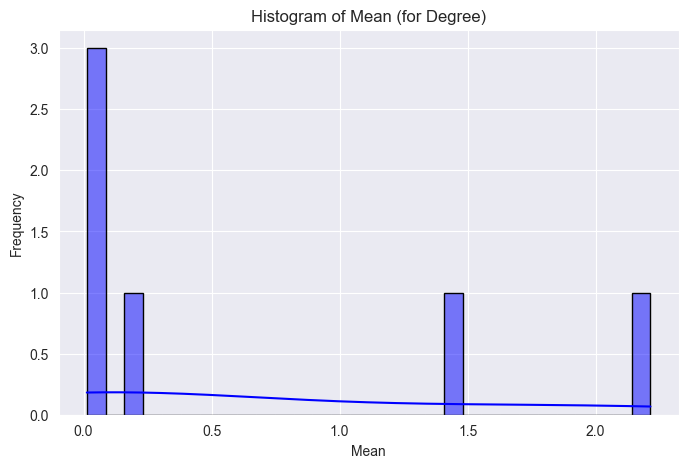

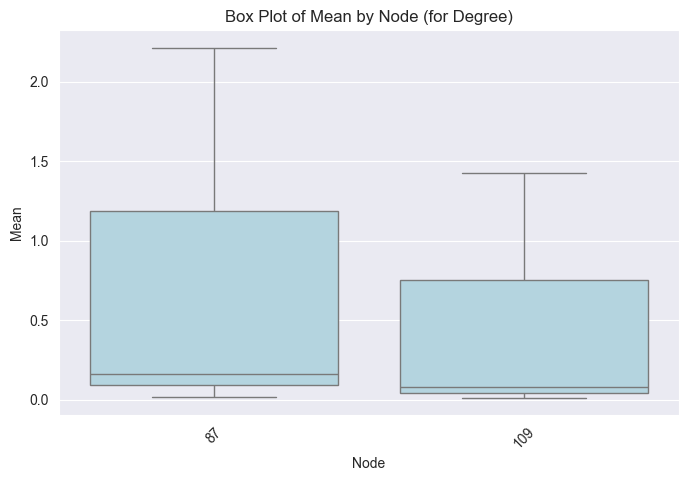

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load data from a CSV file
def load_data(file_path):
    return pd.read_csv(file_path)

# Plot a histogram
def plot_histogram(data, column, title, xlabel, ylabel):
    plt.figure(figsize=(8, 5))
    sns.histplot(data[column], bins=30, kde=True, color='blue', edgecolor='black')
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.show()

# Plot a box plot
def plot_box_plot(data, x_column, y_column, title, xlabel, ylabel):
    plt.figure(figsize=(8, 5))
    sns.boxplot(data=data, x=x_column, y=y_column, color='lightblue')
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.xticks(rotation=45)
    plt.show()

# Filter node data based on the metrics indication CSV file
def filter_nodes_by_metric(metrics_data, metric_column):
    return metrics_data[metrics_data[metric_column] == True]

# Merge the filtered nodes with the main node data
def merge_filtered_nodes(node_data, filtered_nodes):
    return node_data[node_data['Node'].isin(filtered_nodes['Node'])]

# Main function to visualize the data for each metric
def visualize_metrics(node_data, metrics_data):
    # Define metrics to be visualized
    metrics = ['Closeness', 'Clustering', 'Degree']

    for metric in metrics:
        # Filter nodes based on whether the metric is True
        filtered_nodes = filter_nodes_by_metric(metrics_data, metric)

        # Merge the filtered nodes with the node data
        filtered_node_data = merge_filtered_nodes(node_data, filtered_nodes)

        # Create visualizations for each metric
        print(f"Visualizing {metric}...")

        # Plot Histogram
        plot_histogram(filtered_node_data, 'Mean', f'Histogram of Mean (for {metric})', 'Mean', 'Frequency')

        # Plot Box Plot
        plot_box_plot(filtered_node_data, 'Node', 'Mean', f'Box Plot of Mean by Node (for {metric})', 'Node', 'Mean')

# File paths
node_file_path = '../analysis/ppmi/60_70/comparison/pd/node_differences.csv'
metrics_file_path = '../analysis/ppmi/60_70/comparison/pd/node_analysis.csv'

# Load data
node_data = load_data(node_file_path)
metrics_data = load_data(metrics_file_path)

# Visualize the metrics
visualize_metrics(node_data, metrics_data)
